## Hourse Price - Advanced Regression Techniques  
  
[source](https://www.kaggle.com/code/takutokitagawa/house-prices-v2)

In [1]:
!python --version

Python 3.7.14


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [10]:
# read in data
uploaded = files.upload()
#uploaded

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [4]:
# check uploaded files
print(f"train.csv sample: {uploaded['train.csv'][0:10]}")
print(f"test.csv sample: {uploaded['test.csv'][0:10]}")

train.csv sample: b'Id,MSSubCl'
test.csv sample: b'Id,MSSubCl'


In [5]:
data_train = pd.read_csv("train.csv", sep=",")
print(data_train.shape)
data_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data_test = pd.read_csv("test.csv", sep=",")
print(data_test.shape)

(1459, 80)


In [11]:
data_submission = pd.read_csv("sample_submission.csv", sep=",")

In [12]:
# test data does not contain the SalePrice column
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
# check training data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
# concatenate the training and test data to one df
all_df = pd.concat([data_train.drop(columns='SalePrice'), data_test])
all_df.shape

(2919, 80)

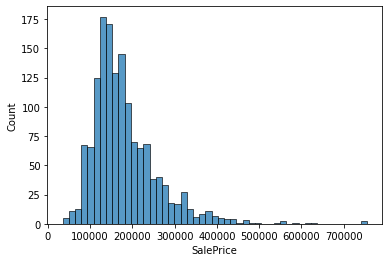

In [16]:
sns.histplot(data_train['SalePrice'])

According to documentation `MSSubClass`, `YrSold` and `MoSold` are categorical variables.

In [17]:
# convert some cols to str type
num_to_str_list = ['MSSubClass','YrSold','MoSold']
for column in num_to_str_list:
  all_df[column] = all_df[column].astype(str)

In [18]:
all_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [24]:
# check and handle null values
for column in all_df.columns:
  if all_df[column].dtype=='0':
    all_df[column] = all_df[column].fillna('None')
  else:
    all_df[column] = all_df[column].fillna(0)

In [25]:
print(all_df.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 80, dtype: bool


In [26]:
# adding new columns
def add_new_columns(df):
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

    df['AreaPerRoom'] = df['TotalSF']/df['TotRmsAbvGrd']

    df['YearBuiltPlusRemod']=df['YearBuilt']+df['YearRemodAdd']

    df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

add_new_columns(all_df)

In [27]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  2919 non-null   int64  
 1   MSSubClass          2919 non-null   object 
 2   MSZoning            2919 non-null   object 
 3   LotFrontage         2919 non-null   float64
 4   LotArea             2919 non-null   int64  
 5   Street              2919 non-null   object 
 6   Alley               2919 non-null   object 
 7   LotShape            2919 non-null   object 
 8   LandContour         2919 non-null   object 
 9   Utilities           2919 non-null   object 
 10  LotConfig           2919 non-null   object 
 11  LandSlope           2919 non-null   object 
 12  Neighborhood        2919 non-null   object 
 13  Condition1          2919 non-null   object 
 14  Condition2          2919 non-null   object 
 15  BldgType            2919 non-null   object 
 16  HouseS

In [30]:
# add one hot encoding OHE
all_df = pd.get_dummies(all_df)
all_df.head()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 348 entries, Id to SaleCondition_Partial
dtypes: float64(13), int64(27), uint8(308)
memory usage: 1.8 MB


In [ ]:
all_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
#switch to training data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
data_train = pd.merge(all_df.iloc[data_train.index[0]:data_train.index[-1]],data_train['SalePrice'],left_index=True,right_index=True)
data_test = all_df.iloc[data_train.index[-1]:]

In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 349 entries, Id to SalePrice
dtypes: float64(13), int64(28), uint8(308)
memory usage: 917.6 KB


skew: 0.1207
kurt: 0.8073


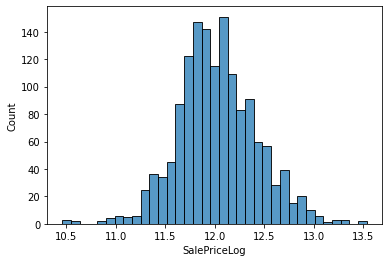

In [54]:
# Make col SalePriceLog
data_train['SalePriceLog'] = np.log(data_train['SalePrice'])
# Check skewness
sns.histplot(data_train['SalePriceLog'])
print(f"skew: {round(data_train['SalePriceLog'].skew(),4)}" )
print(f"kurt: {round(data_train['SalePriceLog'].kurt(),4)}" )

In [73]:
# set explainable variables
train_X = data_train.drop(columns = ['SalePrice','SalePriceLog'])
#train_X = data_train

# set response variable
train_y = data_train['SalePriceLog']

# set test data
test_X = data_train

In [74]:
# load scikit libs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
def lasso_tuning(train_x,train_y):
    # alpha values set in list
    param_list = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0] 

    for cnt,alpha in enumerate(param_list):
        # use Lasso L1 penalty
        lasso = Lasso(alpha=alpha) 
        # bild pipeline
        pipeline = make_pipeline(StandardScaler(), lasso)

        # set train and test data
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

        # fit model using pipeline
        pipeline.fit(X_train,y_train)

        # RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
        test_rmse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
        # check best params
        if cnt == 0:
            best_score = test_rmse
            best_param = alpha
        elif best_score > test_rmse:
            best_score = test_rmse
            best_param = alpha

    # print alpha value and MSE value
    print('alpha : ' + str(best_param))
    print('test score is : ' +str(round(best_score,4)))

    # collect best params
    return best_param

# best_alphaにベストパラメータのalphaが渡される。
best_alpha = lasso_tuning(train_X,train_y)

alpha : 0.01
test score is : 0.1292


In [76]:
# Fit model using best alpha param
lasso = Lasso(alpha = best_alpha)
# ...
pipeline = make_pipeline(StandardScaler(), lasso)
# fit
pipeline.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [77]:
test_X.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,SalePriceLog
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,1,0,0,0,0,1,0,208500,12.247694
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,1,0,0,0,0,1,0,181500,12.109011
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,1,0,0,0,0,1,0,223500,12.317167
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,1,0,0,0,0,0,140000,11.849398
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,1,0,0,0,0,1,0,250000,12.429216


In [78]:
test_X = test_X.drop(columns = ['SalePrice','SalePriceLog'])

In [79]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 350 entries, Id to SalePriceLog
dtypes: float64(14), int64(28), uint8(308)
memory usage: 929.0 KB


In [80]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 348 entries, Id to SaleCondition_Partial
dtypes: float64(13), int64(27), uint8(308)
memory usage: 906.2 KB


In [81]:
# create prediction on test data set
pred = pipeline.predict(test_X)

In [84]:
pred[:5]

array([12.21752102, 12.11217838, 12.26870389, 12.10732985, 12.54336291])

skew: 0.2711
kurt: 0.2663


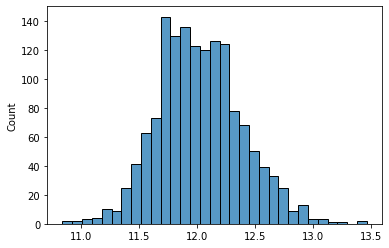

In [82]:
# plot predictions
sns.histplot(pred)
# check skewness and kurt
print(f"skew: {round(pd.Series(pred).skew(),4)}" )
print(f"kurt: {round(pd.Series(pred).kurt(),4)}" )

skew: 1.6982
kurt: 5.5923


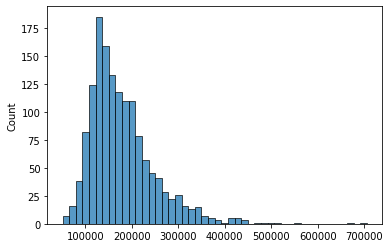

In [85]:
# take anti-log the loged values
pred_exp = np.exp(pred)
# plot exp values
sns.histplot(pred_exp)
# print skrew and kurt again
print(f"skew: {round(pd.Series(pred_exp).skew(),4)}" )
print(f"kurt: {round(pd.Series(pred_exp).kurt(),4)}" )

skew: 0.9218
kurt: 0.6338


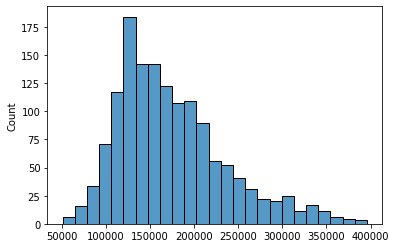

In [86]:
# check same plot with a outlier filter of 400 000
pred_exp_ex_outliars = pred_exp[pred_exp<400000]
# plot again
sns.histplot(pred_exp_ex_outliars)
# 歪度と尖度
print(f"skew: {round(pd.Series(pred_exp_ex_outliars).skew(),4)}" )
print(f"kurt: {round(pd.Series(pred_exp_ex_outliars).kurt(),4)}" )

In [87]:
# check the submission form data
data_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [88]:
# add new column for the predicted sales (OMA)
data_submission['SalePricePred'] = pred_exp
data_submission.head()

,Id,SalePrice,SalePricePred
0,1461,169277.052498,202302.831895
1,1462,187758.393989,182075.803722
2,1463,183583.683570,212926.834729
3,1464,179317.477511,181195.139598
4,1465,150730.079977,280229.142672


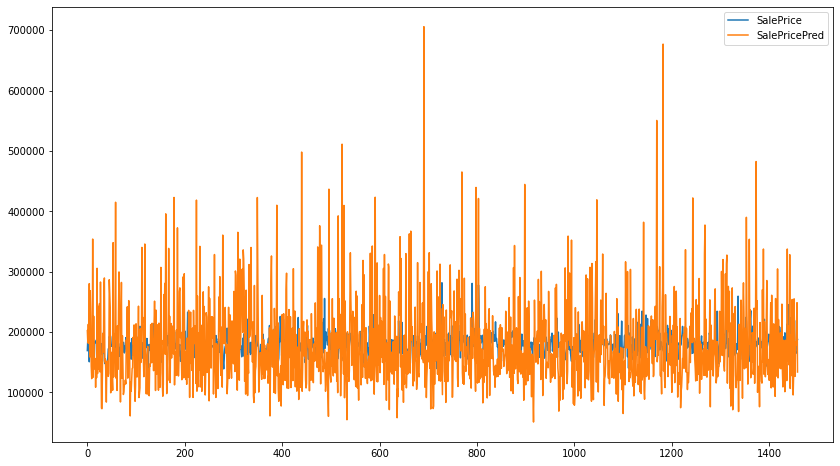

In [89]:
plt.figure(figsize=(14,8))
plt.plot(data_submission["SalePrice"], label = "SalePrice")
plt.plot(data_submission["SalePricePred"], label = "SalePricePred")
plt.legend()
plt.show()

In [98]:
data_submission["AE"] = np.abs(data_submission.SalePrice - data_submission.SalePricePred)
data_submission["APE"] = np.abs(data_submission.SalePrice - data_submission.SalePricePred) / data_submission.SalePrice

In [99]:
data_submission.head()

,Id,SalePrice,SalePricePred,AE,APE
0,1461,169277.052498,202302.831895,33025.779397,0.195099
1,1462,187758.393989,182075.803722,5682.590266,0.030265
2,1463,183583.683570,212926.834729,29343.151159,0.159835
3,1464,179317.477511,181195.139598,1877.662087,0.010471
4,1465,150730.079977,280229.142672,129499.062695,0.859145


In [100]:
print(f"MAE: {np.mean(data_submission.AE)}")
print(f"MAPE: {np.mean(data_submission.APE)}")

MAE: 53830.71851633304
MAPE: 0.30091555955424937
